## Milestone 1 - Data Sanity ( by using Numpy and Pandas)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the CSV file as a DataFrame
df = pd.read_csv('Final.csv')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [123]:
# See the description of the DataFrame
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [124]:
# See the shape of the DataFrame
df.shape

(1101925, 16)

In [125]:
# See the information about the DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [126]:
# Check for null values in the DataFrame
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [127]:
# Replace all null values with NaN
df.replace(to_replace=[None, ''], value=np.nan, inplace=True)

In [128]:
# Change the format of ORDER_CREATION_DATE to datetime[64] with format "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')

In [129]:
# Change the format of REQUESTED_DELIVERY_DATE to datetime[64] with format "%Y%m%d"
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

In [130]:
# Count how many records have order date greater than delivery date
print((df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']).sum())

27142


In [131]:
# Remove records where order date is greater than delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [132]:
# Count records where "ORDER_AMOUNT" field has "-"
print(df[df["ORDER_AMOUNT"] == "-"].shape[0])

0


In [133]:
# Replace "-" with empty string in "ORDER_AMOUNT" field
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace("-", "")

In [134]:
# Count the number of records with ","
comma_count = df['ORDER_AMOUNT'].str.contains(",", na=False).sum()
comma_count

1073406

In [135]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric

In [136]:
# Count the number of records where order date and delivery date are the same
same_date_count = (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE']).sum()
same_date_count

100437

In [137]:
# Count the number of records for each currency type
currency_counts = df['ORDER_CURRENCY'].value_counts()
currency_counts

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [138]:
# Create a new column 'amount_in_usd' and convert non-USD currencies to USD
conversion_rate = {
  "USD": 1,
  "EUR": 0.929501,
  "AUD": 1.526634,
  "CAD": 1.357893,
  "GBP": 0.808359,
  "MYR": 4.590579,
  "PLN": 4.17991,
  "AED": 3.6725,
  "HKD": 7.830013,
  "CHF": 0.90461,
  "RON": 4.60774,
  "SGD": 1.348847,
  "CZK": 22.016245,
  "HUF": 346.404491,
  "NZD": 1.635861,
  "BHD": 0.376,
  "SAR": 3.75,
  "QAR": 3.64,
  "KWD": 0.307464,
  "SEK": 10.711837
}
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')    #converted string values to numeric
df['AMOUNT_IN_USD'] = df.apply(lambda row: row['ORDER_AMOUNT'] * conversion_rate.get(row['ORDER_CURRENCY'], np.nan), axis=1)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5955.415786
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000


In [139]:
# Check for values "0" in the 'amount_in_usd' column
zero_amount_count = (df['AMOUNT_IN_USD'] == 0).sum()
zero_amount_count

237654

In [140]:
# Create a new column 'unique_cust_id' by combining 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df['UNIQUE_CUST_ID'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,887.310950,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,731.851907,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,62735.238563,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1306.450836,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.000000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,5955.415786,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.000000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.000000,12103318114260


## Milestone 2 - EDA

### Q1. Create a Histogram on DISTRIBUTION_CHANNEL

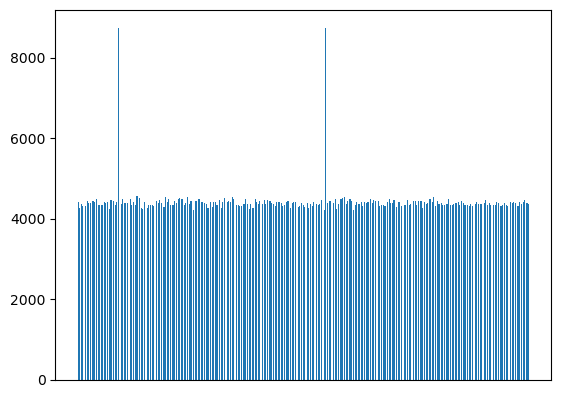

In [141]:
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=400)
plt.xticks([])
plt.show()

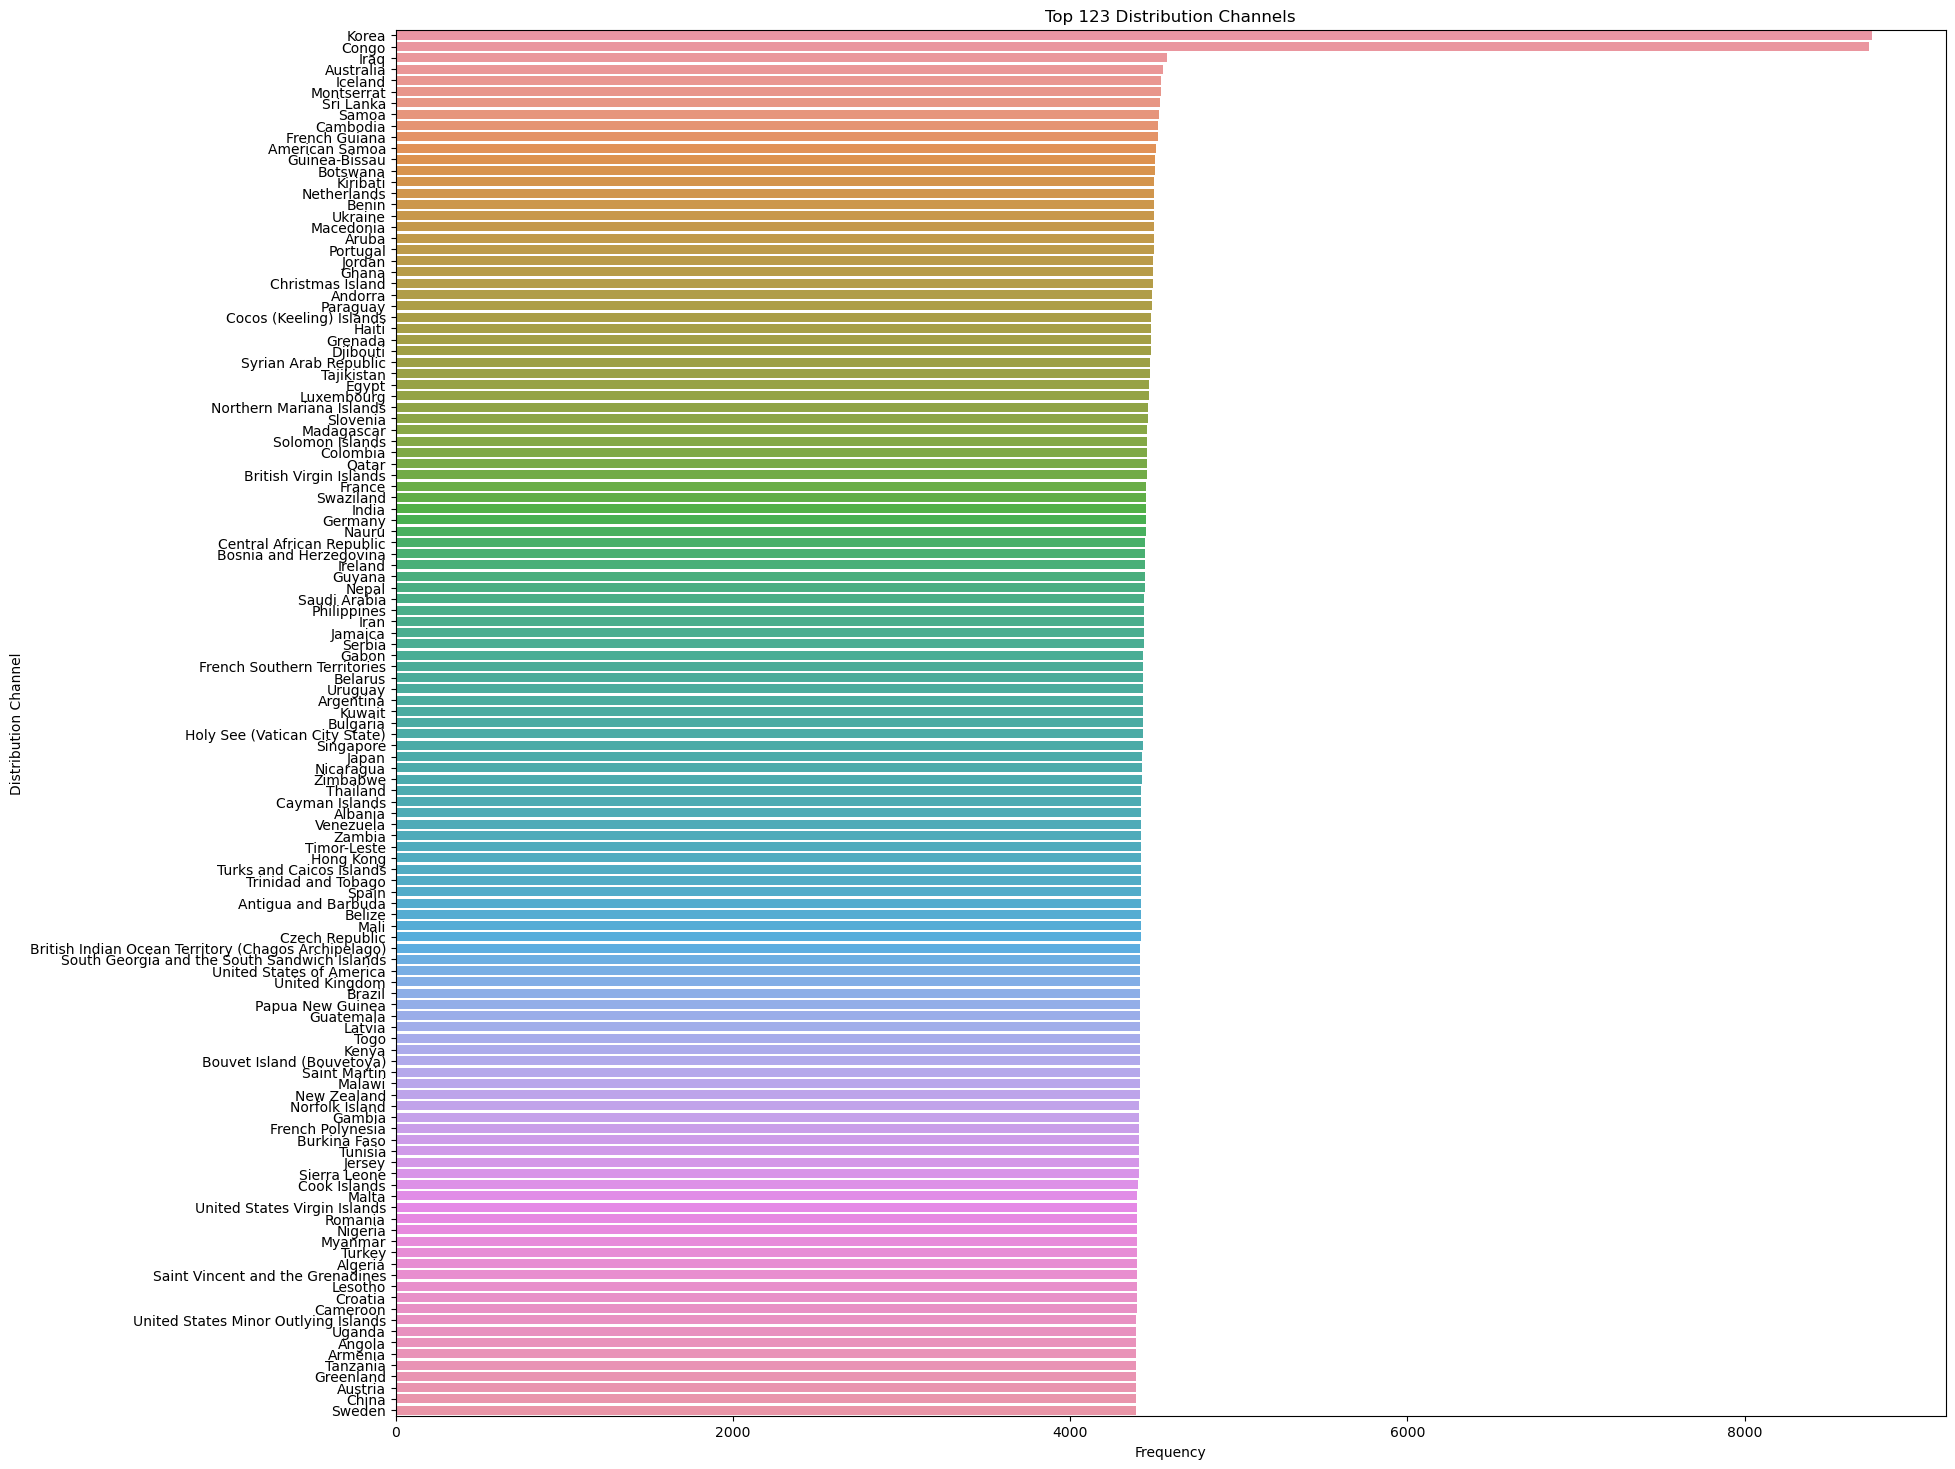

In [142]:
import statistics
Median = statistics.median(df['DISTRIBUTION_CHANNEL'].value_counts())
# Count the frequency of each value in the DISTRIBUTION_CHANNEL column
counts = df['DISTRIBUTION_CHANNEL'].value_counts()

# Filter out the values that occur less frequently than a certain threshold
threshold = Median
counts = counts[counts >= threshold]

# Plot a horizontal bar chart to show the top N values by frequency
plt.figure(figsize=(20, 18))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('Frequency')
plt.ylabel('Distribution Channel')
plt.title(f'Top {len(counts)} Distribution Channels')
plt.show()



### Q2 Create a Pie Chart on ORDER_CURRENC

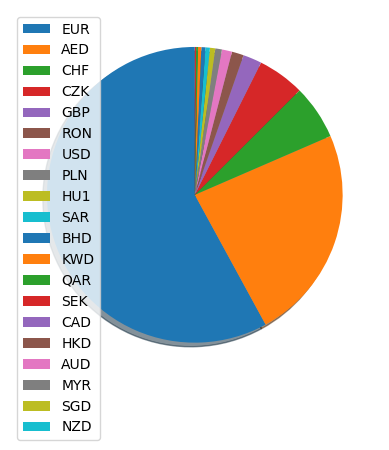

In [143]:
plt.pie(df['ORDER_CURRENCY'].value_counts(), shadow=True, startangle=90)
plt.legend(df['ORDER_CURRENCY'].unique(), loc='upper left')
plt.show()

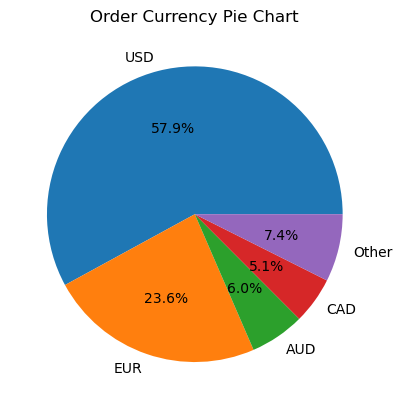

In [144]:
# Get value counts for ORDER_CURRENCY column
currency_count = df['ORDER_CURRENCY'].value_counts()

# Group values that appear less than 5% of the time into "Other" category
threshold = 0.05
small_values = currency_count[currency_count < threshold * currency_count.sum()]
currency_count['Other'] = small_values.sum()
currency_count.drop(index=small_values.index, inplace=True)

# Create pie chart
plt.pie(currency_count.values, labels=currency_count.index, autopct='%1.1f%%')
plt.title('Order Currency Pie Chart')

# Display chart
plt.show()

### Q3 Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

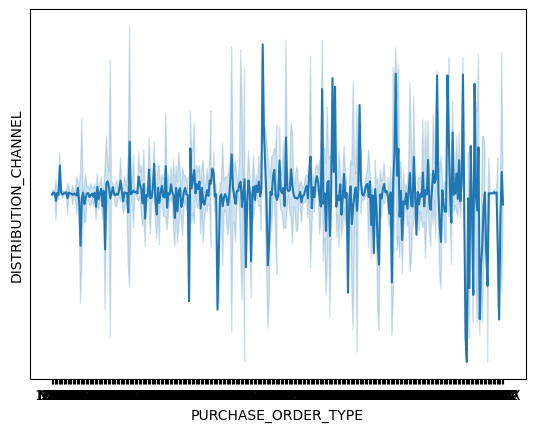

In [145]:
sns.lineplot(x=df['PURCHASE_ORDER_TYPE'], y=df['DISTRIBUTION_CHANNEL'], data=df)
plt.yticks([])
plt.show()

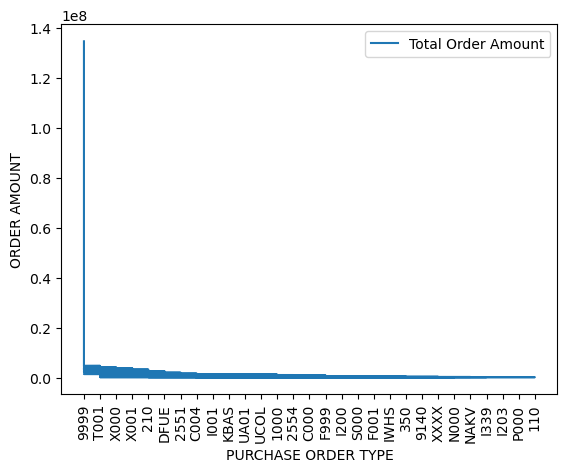

In [146]:
# Group by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL, and calculate total ORDER_AMOUNT
grouped_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['ORDER_AMOUNT'].sum()

# Sort the data in descending order of ORDER_AMOUNT and select top 5 values
top_data = grouped_data.sort_values(ascending=False)[:1500]

# Reset the index
top_data = top_data.reset_index()

# Create a line chart
plt.plot(top_data['PURCHASE_ORDER_TYPE'], top_data['ORDER_AMOUNT'], label='Total Order Amount')
plt.xticks(rotation=90)
plt.xlabel('PURCHASE ORDER TYPE')
plt.ylabel('ORDER AMOUNT')
plt.legend()
plt.show()

<Axes: xlabel='DISTRIBUTION_CHANNEL', ylabel='PURCHASE_ORDER_TYPE'>

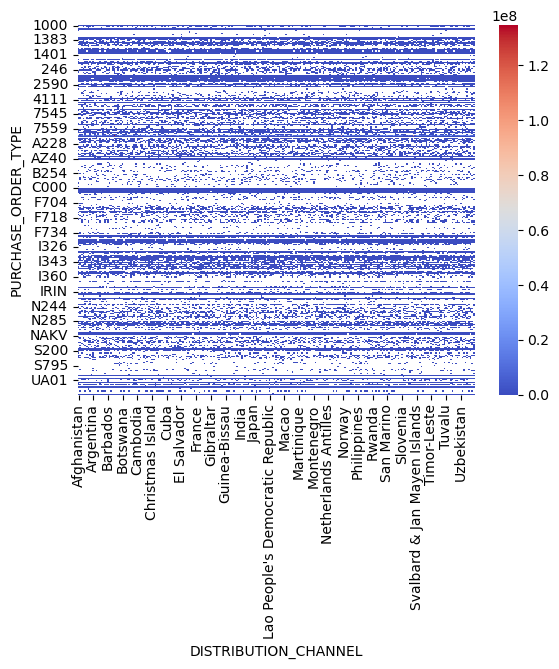

In [147]:
# Aggregate the data by grouping it by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
grouped_df = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).agg({'ORDER_AMOUNT': 'sum'})

# Reset the index to turn the grouped columns into regular columns
grouped_df = grouped_df.reset_index()

# Pivot the table to make PURCHASE_ORDER_TYPE the x-axis, DISTRIBUTION_CHANNEL the y-axis, and ORDER_AMOUNT the color
pivot_df = grouped_df.pivot(index='PURCHASE_ORDER_TYPE', columns='DISTRIBUTION_CHANNEL', values='ORDER_AMOUNT')

# Plot the resulting heatmap
sns.heatmap(pivot_df, cmap='coolwarm')

To analyze the distribution of purchase orders based on order amount, we follow these steps:

- We begin by sorting the data in descending order based on the 'AMOUNT_IN_USD' column.

- Next, we determine the top 20 values for both 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL'. This selection is based on the frequency of occurrence for each value.

- We then filter the sorted data to include only the rows where 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' belong to the top 20 values.

- After filtering, we group the data by 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL', and calculate the sum of the 'AMOUNT_IN_USD' column for each group.

- Finally, we create a line plot to visualize the total order amount for each combination of purchase order type and distribution channel.

- By following these steps, we can effectively examine the distribution of purchase orders based on their order amount across different types and channels.

What can we infer from this line plot?
- We can infer how the total order amount varies across different distribution channels for each purchase order type
- By looking at the individual lines for each purchase order type, we can see which distribution channels generate the most revenue and which generate the least.
- Overall, this analysis can help businesses identify which purchase order types and distribution channels are most profitable and adjust their strategies accordingly

In [ ]:
df_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 20 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = df_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(20).index.tolist()
top_dist_channels = df_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(20).index.tolist()

# Filter the dataframe to include only the top 20 PURCHASE_ORDER_TYPE values and top 20 DISTRIBUTION_CHANNEL values
df_filtered = df_sorted[(df_sorted['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders)) & (df_sorted['DISTRIBUTION_CHANNEL'].isin(top_dist_channels))]

# Group the filtered dataframe by PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL, and get the total ORDER_AMOUNT for each group
grouped_df = df_filtered.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['AMOUNT_IN_USD'].sum().reset_index()

# Create a line plot of ORDER_AMOUNT for each PURCHASE_ORDER_TYPE-DISTRIBUTION_CHANNEL combination
fig, ax = plt.subplots(figsize=(12,8))

for key, grp in grouped_df.groupby(['PURCHASE_ORDER_TYPE']):
    ax = grp.plot(ax=ax, kind='line', x='DISTRIBUTION_CHANNEL', y='AMOUNT_IN_USD', label=key)

plt.title('Top 20 Purchase Order Types and Distribution Channels by Order Amount')
plt.ylabel('Total Order Amount ($)')
plt.xlabel('Distribution Channel')
plt.legend(loc='best')

plt.show()

To analyze the distribution of purchase orders based on their order amount, we follow these steps:

- Initially, we sort the data in descending order by the 'AMOUNT_IN_USD' column to prioritize higher order amounts.

- Next, we determine the top 20 values for both 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' based on their frequency of occurrence within the dataset.

- Subsequently, we filter the data to include only the rows where 'PURCHASE_ORDER_TYPE' belongs to the top 20 values and 'DISTRIBUTION_CHANNEL' is among the top 20 values.

- Following the filtering process, we create a cross-tabulation or contingency table that showcases the relationship between 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' using the filtered data. This allows us to observe how the two variables interact.

- Finally, we visualize the cross-tabulation using a stacked bar chart. The chart represents each combination of 'PURCHASE_ORDER_TYPE' and 'DISTRIBUTION_CHANNEL' as a separate stack within the bar, providing a visual representation of the distribution of purchase orders across different types and channels.

By executing these steps, we can effectively analyze and present the distribution of purchase orders based on their order amount, taking into account the specific types and channels involved.

WHY do we need this ?
- From this analysis, we can infer the most popular types of purchase orders and distribution channels for high-value orders. We can see which combinations are more frequent and get an idea of what types of purchase orders are likely to be associated with which distribution channels

WHY a STACKED BAR PLOT?
- It provides a clear view of the relative proportions of each distribution channel for each purchase order type and highlights any patterns or trends that may exist in the data.
-  A stacked bar chart is appropriate for displaying the distribution of two categorical variables when we want to show the contribution of each category to the whole. 


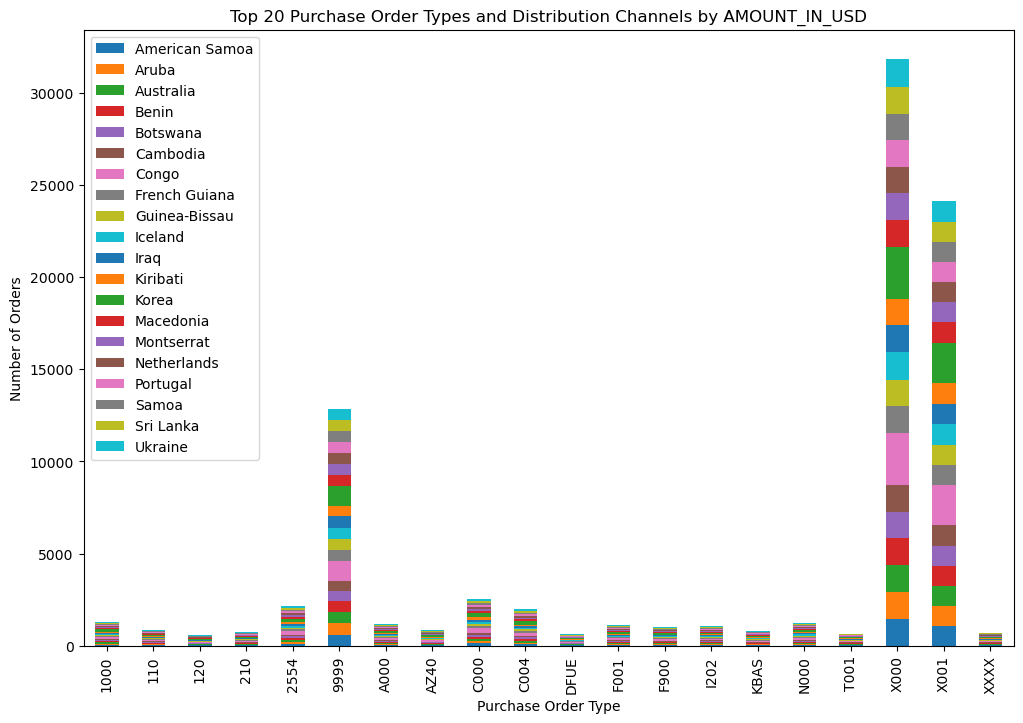

In [149]:
# Sorting the data based on AMOUNT_IN_USD 
df_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 20 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = df_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(20).index.tolist()
top_dist_channels = df_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(20).index.tolist()

# Filter the dataframe to include only the top 20 PURCHASE_ORDER_TYPE values and top 20 DISTRIBUTION_CHANNEL values
df_filtered = df[(df['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders)) & (df['DISTRIBUTION_CHANNEL'].isin(top_dist_channels))]

# Create a cross-tabulation of PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
ct = pd.crosstab(df_filtered['PURCHASE_ORDER_TYPE'], df_filtered['DISTRIBUTION_CHANNEL'])

# Create a stacked bar chart of the cross-tabulation
fig, ax = plt.subplots(figsize=(12,8))
ct.plot(kind='bar', stacked=True, ax=ax)

plt.title('Top 20 Purchase Order Types and Distribution Channels by AMOUNT_IN_USD')
plt.ylabel('Number of Orders')
plt.xlabel('Purchase Order Type')
plt.legend(loc='best')

plt.show()

WHY do we need this ?
- From this analysis, we can infer the most popular types of purchase orders and distribution channels for high-value orders. We can see which combinations are more frequent and get an idea of what types of purchase orders are likely to be associated with which distribution channels

WHY a STACKED BAR PLOT?
- It provides a clear view of the relative proportions of each distribution channel for each purchase order type and highlights any patterns or trends that may exist in the data.
-  A stacked bar chart is appropriate for displaying the distribution of two categorical variables when we want to show the contribution of each category to the whole. 

### Q4 Create a line plot on ORDER_CREATION_DATE and amount_in_usd

Line plot of the order creation date vs. the amount in USD for each order in the dataset
- Line plot: Depicts the correlation between order creation date and amount in USD.
- Offers a comprehensive view of the relationship between these two variables.
- Identifies trends and patterns in the data.


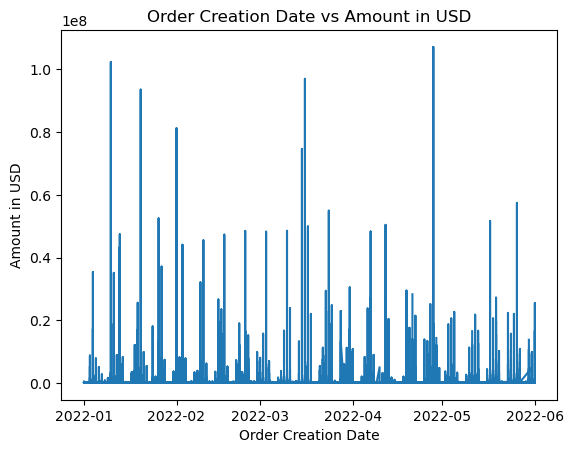

In [150]:
plt.plot(df['ORDER_CREATION_DATE'], df['AMOUNT_IN_USD'])
plt.title('Order Creation Date vs Amount in USD')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.show()

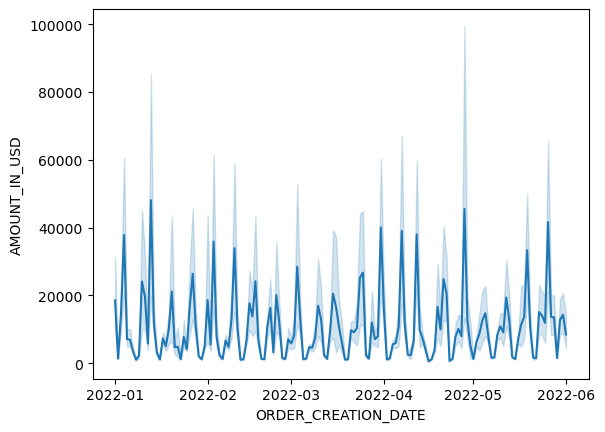

In [151]:
sns.lineplot(x=df['ORDER_CREATION_DATE'], y=df['AMOUNT_IN_USD'], data=df)
plt.show()

### Q5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

A box plot is utilized to present the distribution of order amounts across the entire dataset, offering an overview of the typical range and identifying any potential outliers or skewness in the data.

- The purpose of the box plot is to provide a visual representation that depicts the central tendency, spread, and skewness of the order amount distribution. By examining the box plot, one can observe the interquartile range (IQR), which encompasses the middle 50% of the data. Additionally, the median line within the box denotes the central tendency of the distribution.

- In this particular dataset, the box plot reveals a significant number of outliers, indicating values that are unusually high or low compared to the rest of the data. The presence of these outliers contributes to the skewness of the box plot, indicating that the distribution of order amounts is not symmetrical.

- By analyzing the box plot, it becomes evident that there is variation in the order amounts, with some values deviating significantly from the majority. This insight helps to identify potential anomalies or patterns in the dataset, enabling further investigation or analysis if necessary.


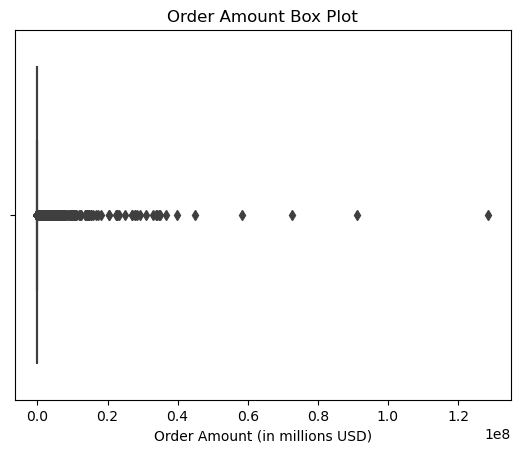

In [152]:
# Set y-axis limits to exclude outliers
plt.ylim(0, df['ORDER_AMOUNT'].quantile(0.95)) 

# Create a box plot using Seaborn
sns.boxplot(data=df, x='ORDER_AMOUNT')
plt.title('Order Amount Box Plot')
plt.xlabel('Order Amount (in millions USD)')
plt.show()


### Q6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

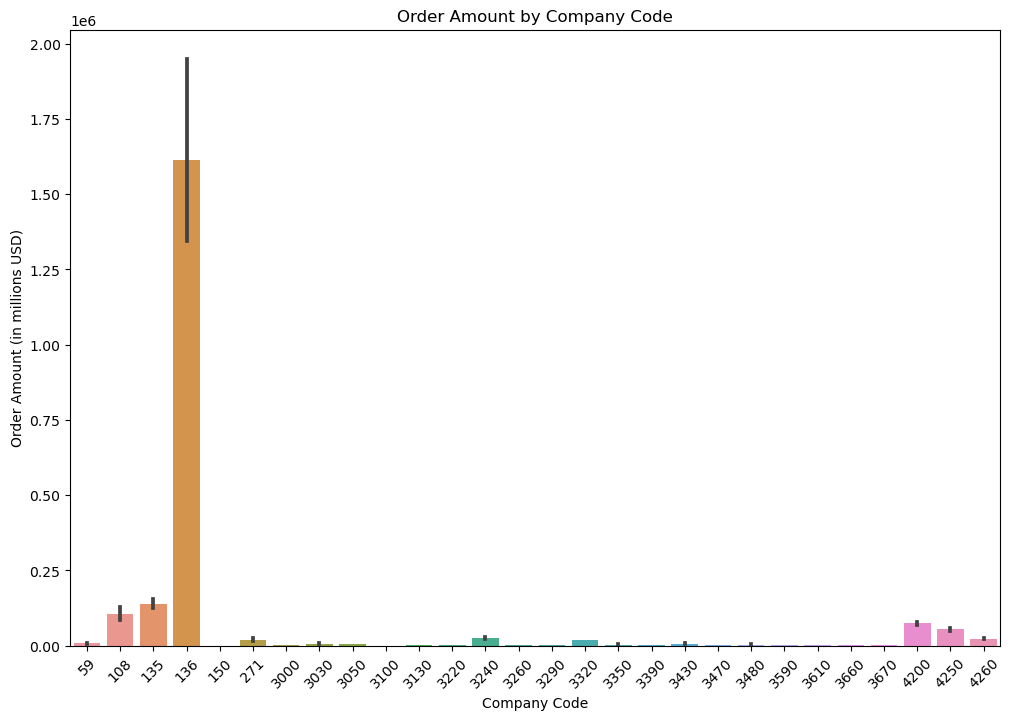

In [153]:
# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)
plt.xlabel('Company Code')
plt.ylabel('Order Amount (in millions USD)')
plt.title('Order Amount by Company Code')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


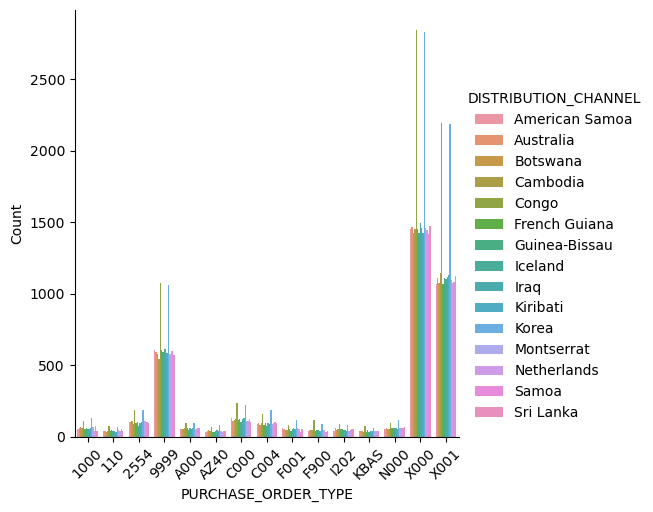

In [154]:
#Grouped bar chart that shows the distribution of purchase orders for each distribution channel

#sort the data according to AMOUNT_IN_USD
data_sorted = df.sort_values(by='AMOUNT_IN_USD', ascending=False)

# Get the top 15 values for PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
top_purchase_orders = data_sorted['PURCHASE_ORDER_TYPE'].value_counts().head(15).index.tolist()
top_distribution_channels = data_sorted['DISTRIBUTION_CHANNEL'].value_counts().head(15).index.tolist()

# Create a filtered dataframe for the top purchase orders and distribution channels
filtered_data = df[df['PURCHASE_ORDER_TYPE'].isin(top_purchase_orders) & 
                     df['DISTRIBUTION_CHANNEL'].isin(top_distribution_channels)]

# Group the data by purchase order type and distribution channel
grouped_data = filtered_data.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().reset_index(name='Count')

# Plot the grouped bar chart
sns.catplot(x='PURCHASE_ORDER_TYPE', y='Count', hue='DISTRIBUTION_CHANNEL', kind='bar', data=grouped_data)
plt.xticks(rotation =45)
plt.show()

## Milestone 3 - Feature Engineering and Selection

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

### Q1. REPLACING OUTLIERS FROM THE COLOUMN AMOUNT_IN_USD WITH THE MEDIAN

In [156]:
# Calculate the median of the "AMOUNT_IN_USD" column
amount_median = df['AMOUNT_IN_USD'].median()

# Calculate the IQR of the "AMOUNT_IN_USD" column
q1 = df['AMOUNT_IN_USD'].quantile(0.25)
q3 = df['AMOUNT_IN_USD'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the mode value
df['AMOUNT_IN_USD'] = df['AMOUNT_IN_USD'].apply(lambda x: amount_median if x < lower_bound or x > upper_bound else x)

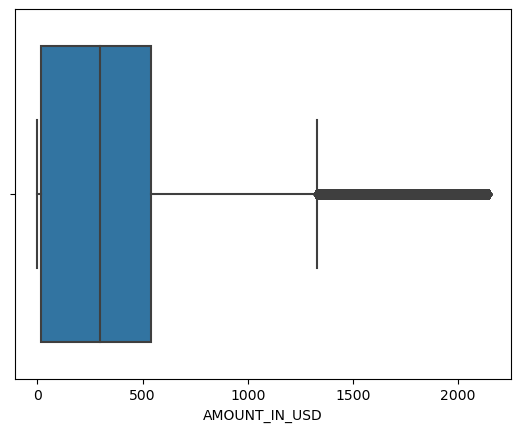

In [157]:
sns.boxplot(x=df['AMOUNT_IN_USD'])
median = df['AMOUNT_IN_USD'].median()
df['AMOUNT_IN_USD'] = df['AMOUNT_IN_USD'].mask(df['AMOUNT_IN_USD'] > 2000000, median)

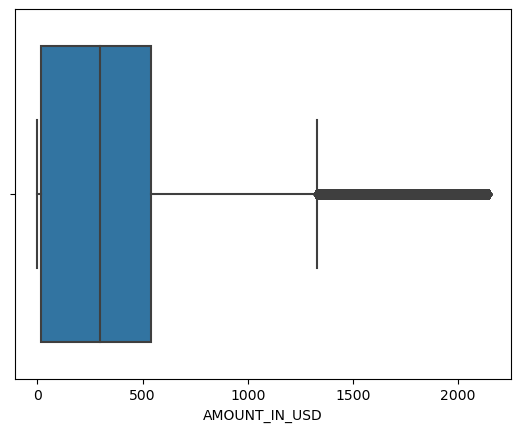

In [158]:
sns.boxplot(x=df['AMOUNT_IN_USD'])
plt.show()

### Q2. Label encoding or One hot Encoding on all the categorical columns

In [159]:
categorical = []
continuous = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    elif df[col].dtype != 'datetime64[ns]':  # Exclude Timestamp columns
        continuous.append(col)

le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])

### Q3. Log Transformations on continuous columns

In [160]:
for col in continuous:
    df[col] = df[col].apply(lambda x: np.log(x))

### Q4. Try to extract new features by grouping existing columns

In [161]:
grouped_df = df.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'AMOUNT_IN_USD': ['max']
}).reset_index()
grouped_df.columns = ['SALES_ORG', 'AVG_ORDER_AMOUNT', 'TOTAL_CREDIT_VALUE', 'UNIQUE_CUSTOMERS', 'MAX_AMOUNT_USD']

grouped_df

,SALES_ORG,AVG_ORDER_AMOUNT,TOTAL_CREDIT_VALUE,UNIQUE_CUSTOMERS,MAX_AMOUNT_USD
0,7.649693,NaN,609429,141,7.657382
1,7.650169,NaN,723167,129,7.641881
2,7.650645,NaN,594668,116,7.667196
3,7.651120,NaN,667986,124,7.660020
4,7.651596,NaN,806552,137,7.660800
...,...,...,...,...,...
2406,8.413165,NaN,613023,143,7.595443
2407,8.413387,NaN,620833,122,7.647887
2408,8.413609,NaN,775251,139,7.643962
2409,8.413831,NaN,487248,146,7.646583


In [162]:
df['AMOUNT_TO_CREDIT_RATIO'] = df['AMOUNT_IN_USD'] / df['RELEASED_CREDIT_VALUE']

FEATURES USING DATE TIME MANIPULATION

In [163]:
df['DAYS_LEFT'] = (df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']).dt.days
df['TIME_LEFT'] = df['REQUESTED_DELIVERY_DATE'] - df['ORDER_CREATION_DATE']

### Q5. Create a heatmap to find correlation between the columns

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19300\3247852998.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


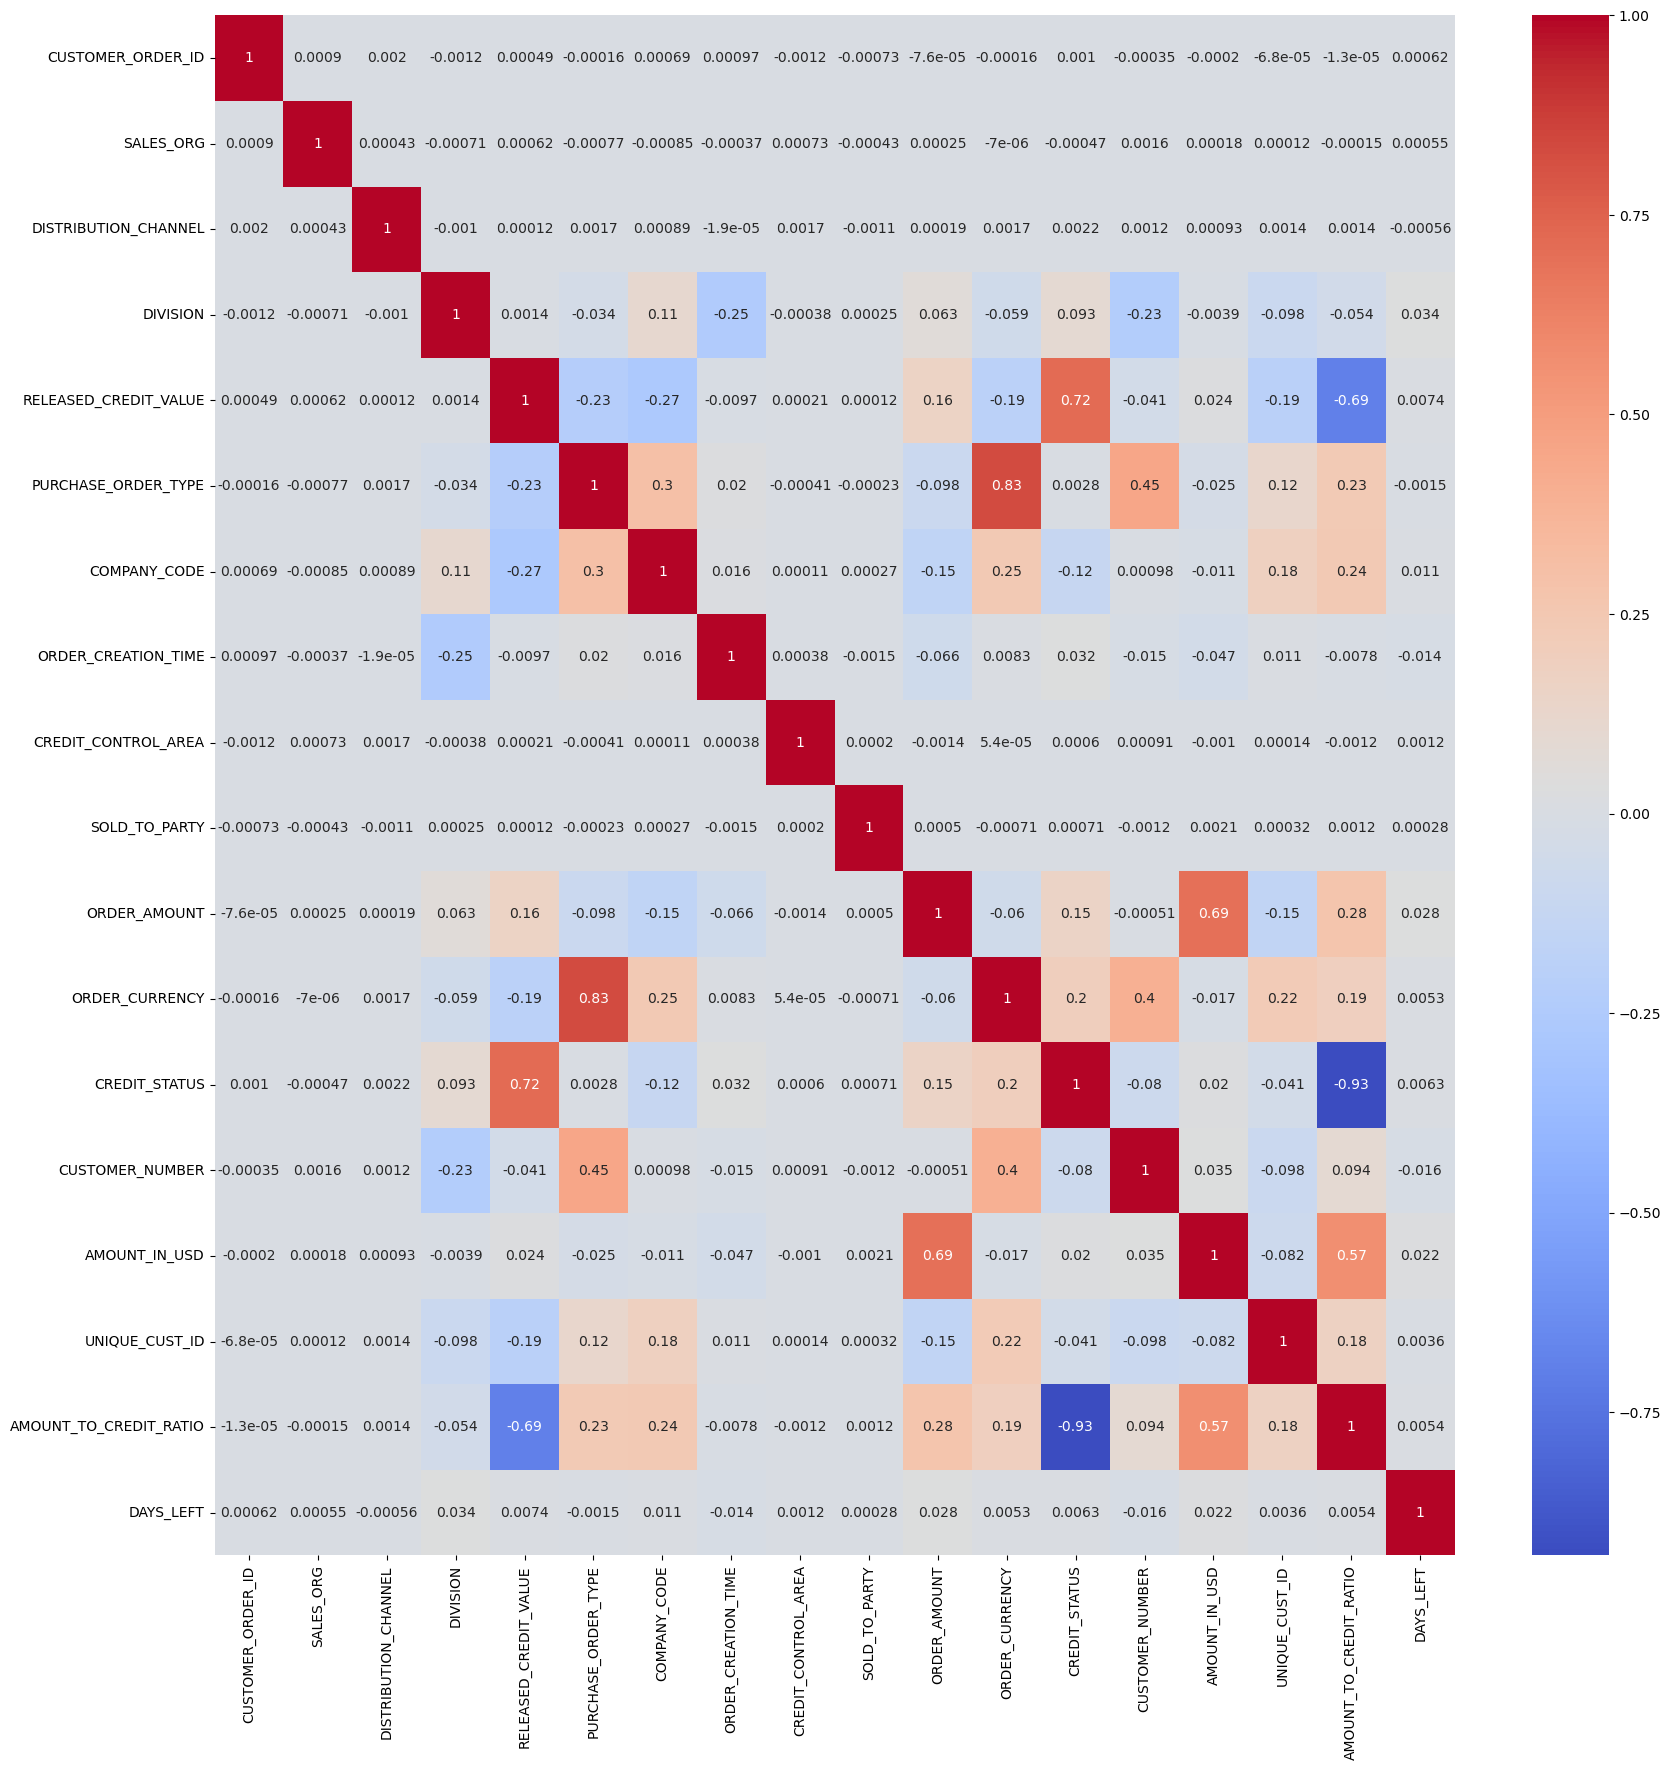

In [164]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Q6. Try to identify important or relevant columns for feature extraction

In [165]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19300\2708442181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('CREDIT_STATUS', 'AMOUNT_TO_CREDIT_RATIO')]


# Milestone 4

### Q1. Modify the dataset to pass into any type of machine learning models.

In [ ]:
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV


In [177]:
datasetTrain = "FinalNew.csv"
df = pd.read_csv(datasetTrain)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [178]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    

In [179]:
df.rename(columns = {'ORDER_AMOUNT': 'target'}, inplace = True)

In [180]:
df.dropna(inplace = True)

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

### Q2. Try different machine learning models like -
 - Linear Regression
 - Support Vector Machine
 - Decision Tree
 - Random Forest
 - AdaBoost
 - Xgboost etc.

In [181]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

# regressor_models.pop(33)
# regressor_models.pop(46)

('SVR', SVR())

In [199]:
regressor_models

[('ARDRegression', ARDRegression()),
 ('AdaBoostRegressor', AdaBoostRegressor()),
 ('BaggingRegressor', BaggingRegressor()),
 ('BayesianRidge', BayesianRidge()),
 ('CCA', CCA()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('DummyRegressor', DummyRegressor()),
 ('ElasticNet', ElasticNet()),
 ('ElasticNetCV', ElasticNetCV()),
 ('ExtraTreeRegressor', ExtraTreeRegressor()),
 ('ExtraTreesRegressor', ExtraTreesRegressor()),
 ('GammaRegressor', GammaRegressor()),
 ('GaussianProcessRegressor', GaussianProcessRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
 ('HuberRegressor', HuberRegressor()),
 ('IsotonicRegression', IsotonicRegression()),
 ('KNeighborsRegressor', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('Lars', Lars()),
 ('LarsCV', LarsCV()),
 ('Lasso', Lasso()),
 ('LassoCV', LassoCV()),
 ('LassoLars', LassoLars()),
 ('LassoLarsCV', LassoLarsCV()),
 ('LassoLarsIC', Lass

### Q3. Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [182]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    meanSquaredError = mean_squared_error(y_test, y_pred)
    rootMeanSquaredError = np.sqrt(meanSquaredError)
    r2 = r2_score(y_test, y_pred)
    return model.__class__.__name__, model, meanSquaredError, rootMeanSquaredError, r2

In [183]:
df_comp = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
bestModel = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])

for model in regressor_models:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_comp = pd.concat([df_comp, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02016e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (st

### Q4. Compare the accuracies of all the models

In [202]:
df_comp = df_comp.sort_values(by = ['MSE'], ascending = True)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
print(df_comp.head())
print(bestModel.head())


                                           Regressor  \
0                         RadiusNeighborsRegressor()   
0  (DecisionTreeRegressor(max_features=1.0, rando...   
0  (ExtraTreeRegressor(random_state=1907156376), ...   
0                    HistGradientBoostingRegressor()   
0  (DecisionTreeRegressor(random_state=771477291)...   

                           Model           MSE          RMSE        R2  
0       RadiusNeighborsRegressor  3.879738e+07   6228.754144  0.992516  
0          RandomForestRegressor  2.504737e+09  50047.352518  0.516829  
0            ExtraTreesRegressor  2.544436e+09  50442.403648  0.509171  
0  HistGradientBoostingRegressor  2.665316e+09  51626.693870  0.485853  
0               BaggingRegressor  2.723770e+09  52189.748970  0.474577  
                                           Regressor  \
0                         RadiusNeighborsRegressor()   
0  (DecisionTreeRegressor(max_features=1.0, rando...   
0  (ExtraTreeRegressor(random_state=1907156376), ...   
0

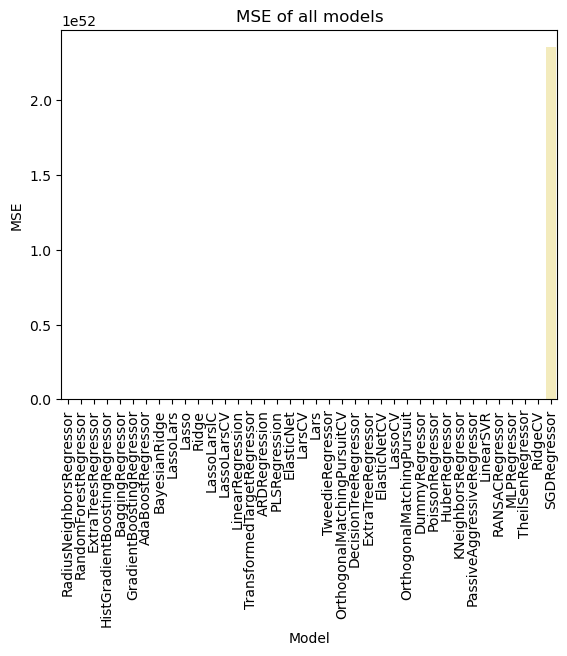

In [185]:
sns.barplot(x = 'Model', y = 'MSE', data = df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [203]:
df_comp = df_comp.sort_values(by = ['RMSE'], ascending = True)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()

,Regressor,Model,MSE,RMSE,R2
0,RadiusNeighborsRegressor(),RadiusNeighborsRegressor,3.879738e+07,6228.754144,0.992516
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,2.504737e+09,50047.352518,0.516829
0,"(ExtraTreeRegressor(random_state=1907156376), ...",ExtraTreesRegressor,2.544436e+09,50442.403648,0.509171
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,2.665316e+09,51626.693870,0.485853
0,(DecisionTreeRegressor(random_state=771477291)...,BaggingRegressor,2.723770e+09,52189.748970,0.474577


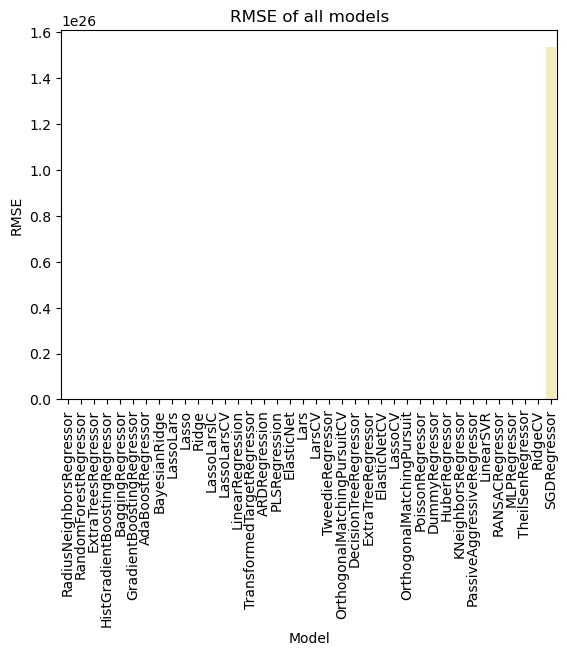

In [188]:
sns.barplot(x = 'Model', y = 'RMSE', data =  df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [192]:
df_comp = df_comp[df_comp['R2'] > 0]
df_comp = df_comp.sort_values(by = ['R2'], ascending = False)
bestModel = pd.concat([bestModel, df_comp.sort_values(by = ['MSE'], ascending = True).head(5)])
df_comp.head()

,Regressor,Model,MSE,RMSE,R2
0,RadiusNeighborsRegressor(),RadiusNeighborsRegressor,3.879738e+07,6228.754144,0.992516
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,2.504737e+09,50047.352518,0.516829
0,"(ExtraTreeRegressor(random_state=1907156376), ...",ExtraTreesRegressor,2.544436e+09,50442.403648,0.509171
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,2.665316e+09,51626.693870,0.485853
0,(DecisionTreeRegressor(random_state=771477291)...,BaggingRegressor,2.723770e+09,52189.748970,0.474577


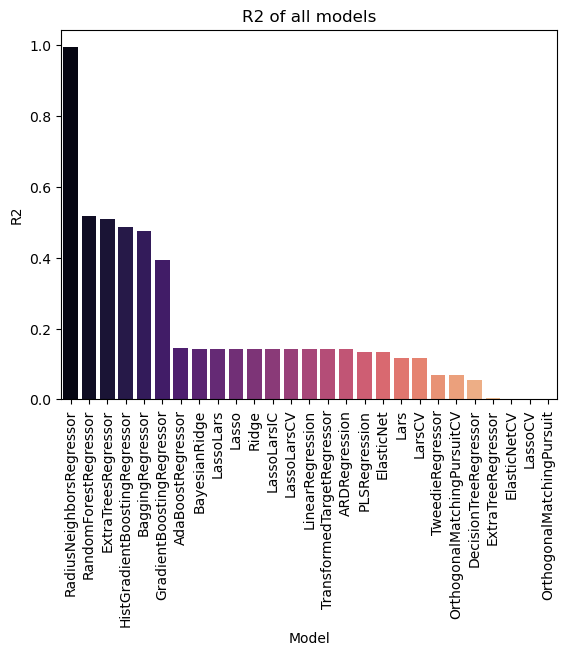

In [193]:
sns.barplot(x = 'Model', y = 'R2', data = df_comp, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

### Q5. Select the best possible model

In [194]:
bestModel = bestModel.drop_duplicates()
bestModel

,Regressor,Model,MSE,RMSE,R2
0,RadiusNeighborsRegressor(),RadiusNeighborsRegressor,3.879738e+07,6228.754144,0.992516
0,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor,2.504737e+09,50047.352518,0.516829
0,"(ExtraTreeRegressor(random_state=1907156376), ...",ExtraTreesRegressor,2.544436e+09,50442.403648,0.509171
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,2.665316e+09,51626.693870,0.485853
0,(DecisionTreeRegressor(random_state=771477291)...,BaggingRegressor,2.723770e+09,52189.748970,0.474577


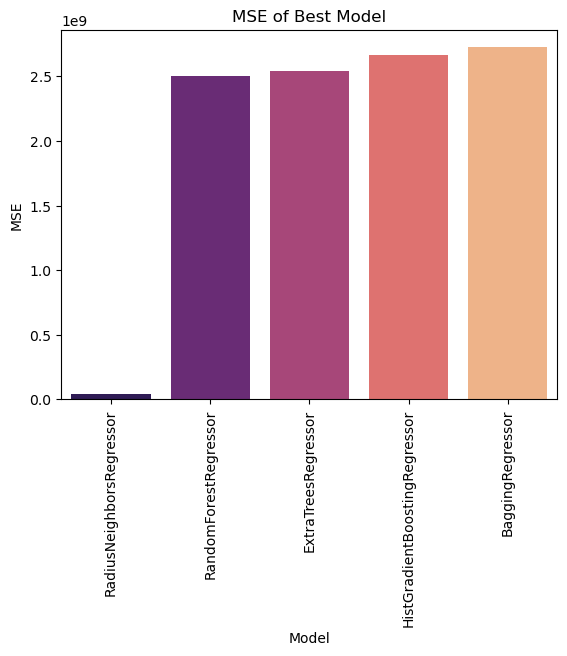

In [195]:
sns.barplot(x = 'Model', y = 'MSE', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

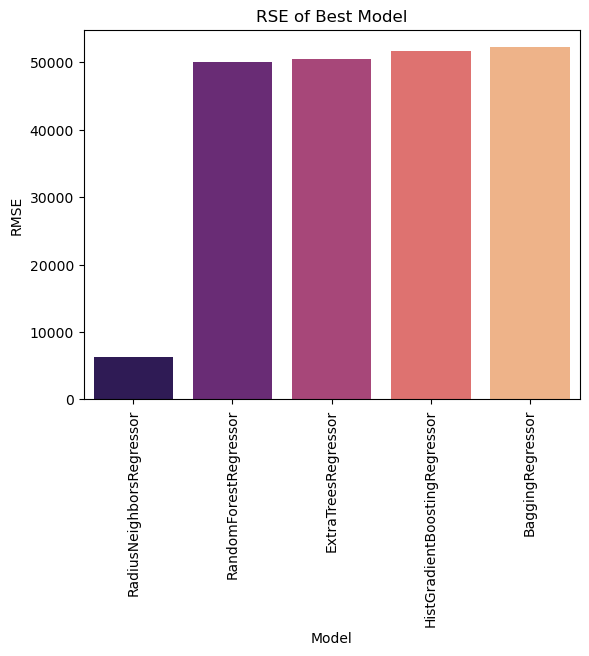

In [196]:
sns.barplot(x = 'Model', y = 'RMSE', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

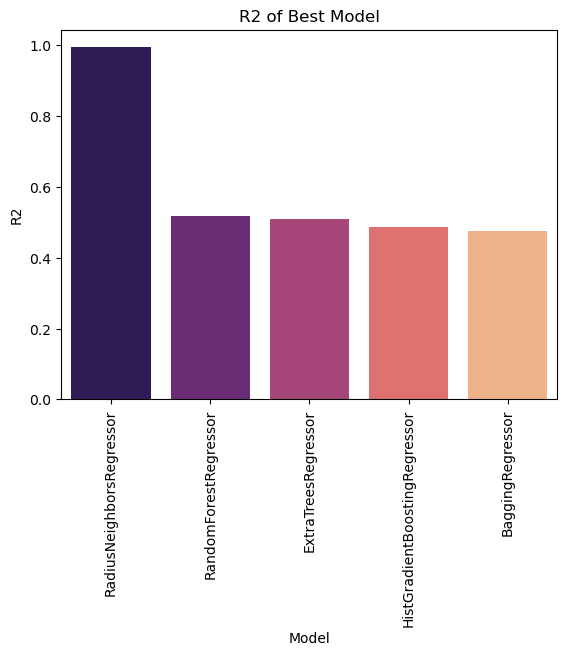

In [197]:
sns.barplot(x = 'Model', y = 'R2', data = bestModel, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

### Q6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms Come up with the best possible model accuracy.

In [206]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_
    
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('Best Parameters:', best_params)
    print('Best Score:', best_score)
    print('Best Estimator:', best_estimator)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)
    
    return best_estimator, mse, rmse, r2


In [207]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

Regressor
Error
Model
Error
MSE
Error
RMSE
Error
R2
Error
